##### Image Classification

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# import keras_core as keras
import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

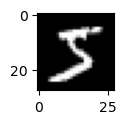

In [4]:
plt.figure(figsize=(1, 1))
plt.imshow(x_train[0], cmap='gray')

In [5]:
y_train[0]

5

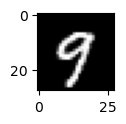

In [6]:
plt.figure(figsize=(1, 1))
plt.imshow(x_train[45], cmap='gray')

In [7]:
y_train[45]

9

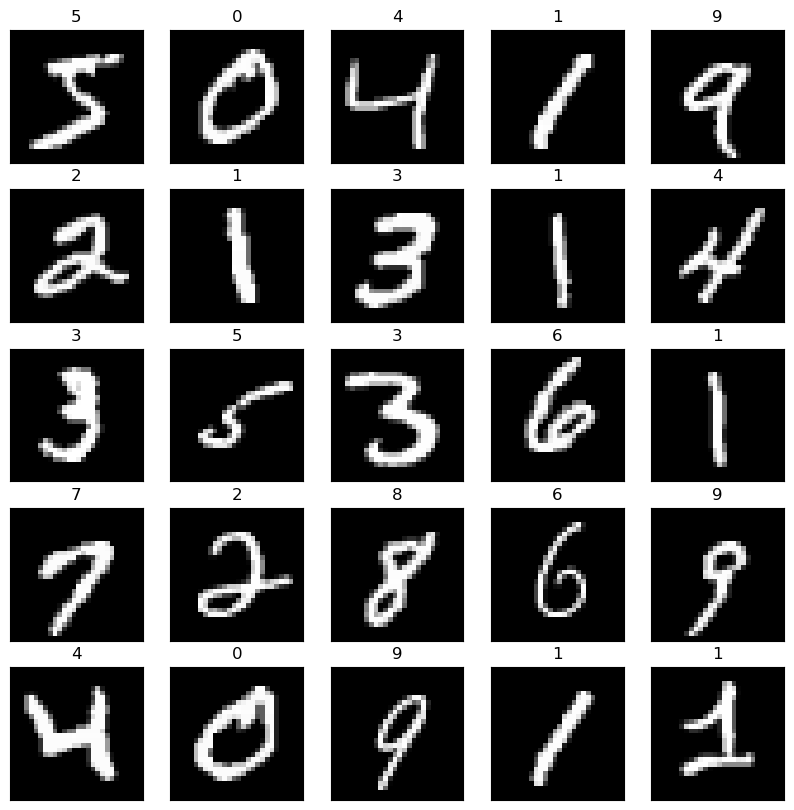

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

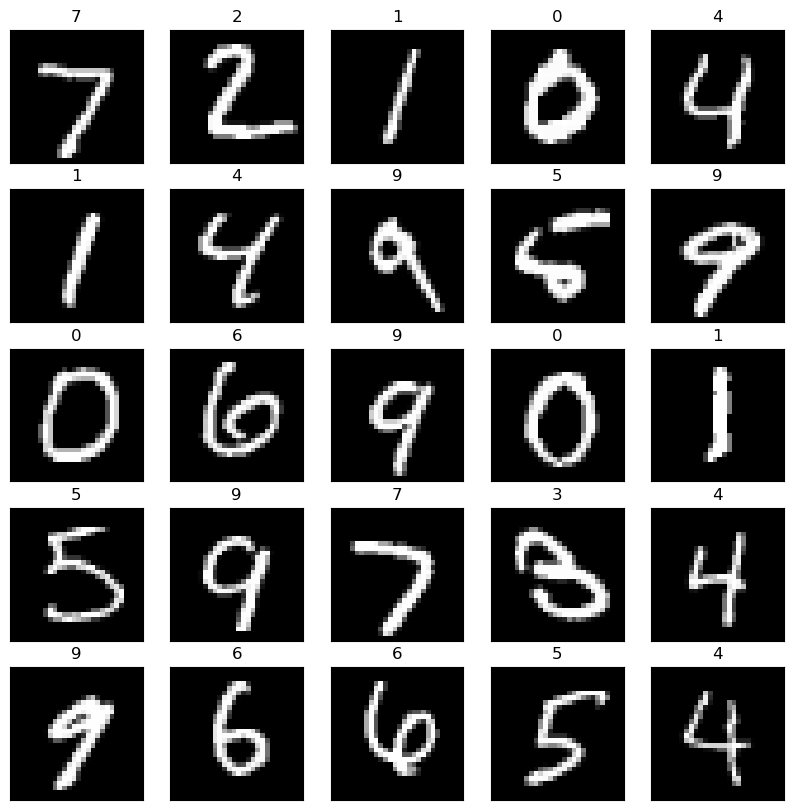

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_test[i])

Sequential API

In [27]:
model = keras.Sequential()

model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, activation='relu', kernel_size=(3, 3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=16, activation='relu', kernel_size=(3, 3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Visualise the model

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

Functional API

In [25]:
model = keras.Input(shape=(28, 28, 1))
model = keras.layers.Conv2D(filters=32, activation='relu', kernel_size=(3, 3))(model)
model = keras.layers.MaxPool2D(pool_size=(2, 2))(model)

model = keras.layers.Conv2D(filters=16, activation='relu', kernel_size=(3, 3))(model)
model = keras.layers.MaxPool2D(pool_size=(2, 2))(model)

model = keras.layers.Flatten()(model)
model = keras.layers.Dense(256, activation='relu')(model)
model = keras.layers.Dense(128, activation='relu')(model)
model = keras.layers.Dense(10, activation='softmax')(model)

##### Compile the model

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8853 - loss: 0.9675
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9788 - loss: 0.0730
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0588
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9861 - loss: 0.0466
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0350
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0266
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0247
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0257


In [30]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9824 - loss: 0.0727


[0.06343276053667068, 0.9847000241279602]

In [35]:
import cv2

(28, 28)

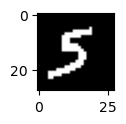

In [83]:
new_img = cv2.imread('images/new-char1.jpg', 0)
new_img = cv2.resize(new_img, (28, 28))
_, new_img = cv2.threshold(new_img, 80, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(1, 1))
plt.imshow(new_img, cmap='gray')
new_img.shape

In [62]:
new_img = np.reshape(new_img, (1, 28, 28))
new_img.shape

(1, 28, 28)

In [76]:
pred = model.predict(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [78]:
pred

array([[1.3842086e-19, 1.7296838e-24, 4.1695189e-20, 8.6870838e-14,
        4.5670614e-18, 1.0000000e+00, 5.2359076e-12, 1.7091334e-14,
        1.7491790e-12, 4.7032994e-10]], dtype=float32)

In [79]:
np.argmax(pred)

5

(28, 28)

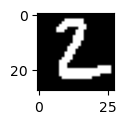

In [84]:
new_img = cv2.imread('images/new-char.png', 0)
new_img = cv2.resize(new_img, (28, 28))
_, new_img = cv2.threshold(new_img, 80, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(1, 1))
plt.imshow(new_img, cmap='gray')
new_img.shape

In [85]:
new_img = np.reshape(new_img, (1, 28, 28))
new_img.shape

(1, 28, 28)

In [86]:
pred = model.predict(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [87]:
pred

array([[1.7532321e-18, 1.0194106e-18, 1.0000000e+00, 7.4195893e-15,
        4.6769890e-14, 2.0483897e-20, 6.1509456e-13, 1.1623872e-20,
        1.2667559e-20, 6.6222431e-23]], dtype=float32)

In [88]:
np.argmax(pred)

2